In [4]:
import os
import json
import pandas as pd
import matplotlib as plt

In [2]:
# Access to Twitter data requires developer access API.
# Dataset kindly provided by Erik in three batches

# Create merged dataframe

folder_path = '/Users/user/Documents/cerebrum-assignment/data/raw/CerebrumDAO_Public_Information/twitter_data'  # Update if needed

all_tweets = []

# Loop through all JSON files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json') and 'tweet' in filename.lower():
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            try:
                data = json.load(f)
                # Check if it's a dict with a "tweets" key that is a list
                if isinstance(data, dict) and "tweets" in data and isinstance(data["tweets"], list):
                    all_tweets.extend(data["tweets"])
                else:
                    print(f"Skipped {filename}: not a dict with a 'tweets' list.")
            except Exception as e:
                print(f"Error loading {filename}: {e}")

# Convert to DataFrame
df = pd.DataFrame(all_tweets)

print(f"Loaded {len(df)} tweets from {folder_path}")
df.head()

Loaded 592 tweets from /Users/user/Documents/cerebrum-assignment/data/raw/CerebrumDAO_Public_Information/twitter_data


,public_metrics,edit_history_tweet_ids,text,created_at,id,referenced_tweets,entities,attachments
0,"{'retweet_count': 1, 'reply_count': 8, 'like_c...",[1872529015665578451],gm 🧠,2024-12-27T06:24:41.000Z,1872529015665578451,NaN,NaN,NaN
1,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1872524243663208448],@rugunicorn Yes,2024-12-27T06:05:44.000Z,1872524243663208448,"[{'type': 'replied_to', 'id': '187251860694228...",NaN,NaN
2,"{'retweet_count': 35, 'reply_count': 15, 'like...",[1872334860813287578],$NEURON is Now Live on Base! 🧠\n\nFollowing th...,2024-12-26T17:33:11.000Z,1872334860813287578,NaN,"{'urls': [{'start': 210, 'end': 233, 'url': 'h...",{'media_keys': ['3_1872334672711016448']}
3,"{'retweet_count': 15, 'reply_count': 5, 'like_...",[1872208623931412928],It's just heartwarming seeing how much each Bi...,2024-12-26T09:11:34.000Z,1872208623931412928,"[{'type': 'quoted', 'id': '1871689823427387878'}]","{'urls': [{'start': 248, 'end': 271, 'url': 'h...",NaN
4,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",[1872207973826846911],@BitgetWallet @bioprotocol @pumpdotscience @vi...,2024-12-26T09:08:59.000Z,1872207973826846911,"[{'type': 'replied_to', 'id': '187184888547321...","{'mentions': [{'start': 0, 'end': 13, 'usernam...",NaN


In [175]:
# List of all columns
df.columns.tolist()

['public_metrics',
 'edit_history_tweet_ids',
 'text',
 'created_at',
 'id',
 'referenced_tweets',
 'entities',
 'attachments']

In [115]:
# SAVE DataFrame to CSV

df.to_csv('cerebrumdao_twitter_all.csv', index=False)

In [176]:
# Total number of tweets
print("Total tweets:", len(df))

# Number of unique users (if 'author_id' or similar exists)
if 'author_id' in df.columns:
    print("Unique users:", df['author_id'].nunique())

Total tweets: 592


In [186]:
# Most liked tweet
if 'public_metrics' in df.columns:
    df['like_count'] = df['public_metrics'].apply(lambda x: x.get('like_count', 0) if isinstance(x, dict) else 0)
    df['retweet_count'] = df['public_metrics'].apply(lambda x: x.get('retweet_count', 0) if isinstance(x, dict) else 0)

    most_liked = df.sort_values('like_count', ascending=False).head(1)
    print("Most liked tweet:")
    print(most_liked[['text', 'like_count']])

    most_retweeted = df.sort_values('retweet_count', ascending=False).head(1)
    print("\nMost retweeted tweet:")
    print(most_retweeted[['text', 'retweet_count']])

Most liked tweet:
                                                text  like_count
2  $NEURON is Now Live on Base! 🧠\n\nFollowing th...         203

Most retweeted tweet:
                                                  text  retweet_count
126  RT @cz_binance: Learning at a small gathering ...           1593


In [6]:
# Evaluate tweet activity over time

# Convert 'created_at' to datetime (if not already)
df['created_at'] = pd.to_datetime(df['created_at'])

# Set 'created_at' as the index
df = df.set_index('created_at')

# Group by week and count tweets
weets_per_week = df.resample('W').size()

fig, ax = plt.subplots(figsize=(12, 4))
tweets_per_week.plot(kind='bar', ax=ax)

plt.title('Tweets per Week')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.tight_layout()

# Format x-axis to show only the date part
ax.set_xticklabels([d.strftime('%Y-%m-%d') for d in tweets_per_week.index], rotation=45, ha='right')

# fig.savefig('tweetWeek.png', dpi=300, bbox_inches='tight')  # Use fig.savefig, not plt.savefig
plt.show()
# plt.close(fig)

KeyError: 'created_at'

In [188]:
# Group by month and count tweets

# Convert 'created_at' to datetime (if not already)
# df['created_at'] = pd.to_datetime(df['created_at']) # <-- activate if needed

# Set 'created_at' as the index
# df = df.set_index('created_at') # <-- activate if needed

tweets_per_month = df.resample('M').size()

fig, ax = plt.subplots(figsize=(12, 4))
tweets_per_month.plot(kind='bar', ax=ax)

plt.title('Tweets per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.tight_layout()

# Format x-axis to show only year and month
ax.set_xticklabels([d.strftime('%Y-%m') for d in tweets_per_month.index], rotation=45, ha='right')

#fig.savefig('tweetMonth.png', dpi=300, bbox_inches='tight')  # Use fig.savefig, not plt.savefig
#plt.show()
plt.close(fig)

/var/folders/nl/qcn3hjks21bdn5btqv97xb840000gn/T/ipykernel_12685/2565525042.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tweets_per_month = df.resample('M').size()


In [189]:
# Evaluate general sentiment on tweets (scores: -1 negative, 0 neutral, 1 positive)

import textblob
from textblob import TextBlob
if 'text' in df.columns:
    df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
else:
    print("No 'text' column found in your DataFrame.")

In [190]:
# Show a few tweets with their sentiment scores
df[['text', 'polarity', 'subjectivity']].head()

,text,polarity,subjectivity
created_at,,,
2024-12-27 06:24:41+00:00,gm 🧠,0.000000,0.000000
2024-12-27 06:05:44+00:00,@rugunicorn Yes,0.000000,0.000000
2024-12-26 17:33:11+00:00,$NEURON is Now Live on Base! 🧠\n\nFollowing th...,-0.415909,0.650000
2024-12-26 09:11:34+00:00,It's just heartwarming seeing how much each Bi...,0.137273,0.350909
2024-12-26 09:08:59+00:00,@BitgetWallet @bioprotocol @pumpdotscience @vi...,0.000000,1.000000


In [191]:
# Average scoring shows mostly neutral to mildly positive sentiment

print("Average polarity:", df['polarity'].mean())
print("Average subjectivity:", df['subjectivity'].mean())

Average polarity: 0.17309108618190647
Average subjectivity: 0.38629615887428387


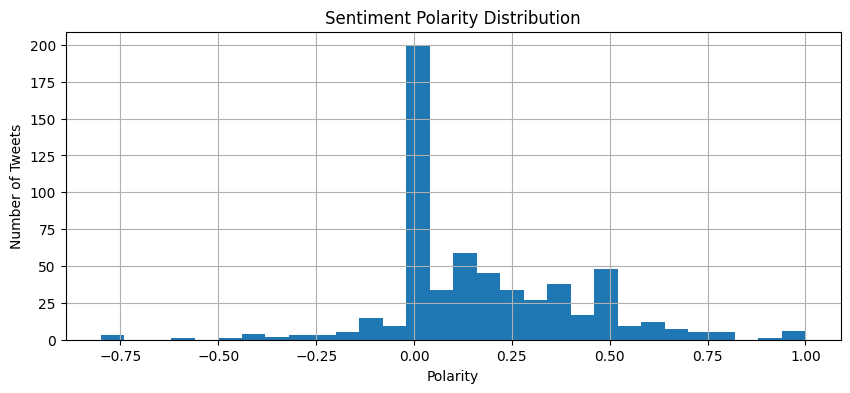

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
df['polarity'].hist(bins=30)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Number of Tweets')

fig.savefig('tweetSentiment.png', dpi=300, bbox_inches='tight')  # Use fig.savefig, not plt.savefig
#plt.show()
plt.close(fig)

In [150]:
print("Most positive tweet:")
print(df.loc[df['polarity'].idxmax()]['text'])

print("\nMost negative tweet:")
print(df.loc[df['polarity'].idxmin()]['text'])

Most positive tweet:
@notthreadguy It’s also the best use case for crypto 🧠

Most negative tweet:
RT @TrillionHubz: 🔥Top-tier #DeSci Projects launched on $BIO @bioprotocol rank by MarketCap 🧬

1. $VITA @vita_dao - MC: $30M
2. $HAIR @Hair…


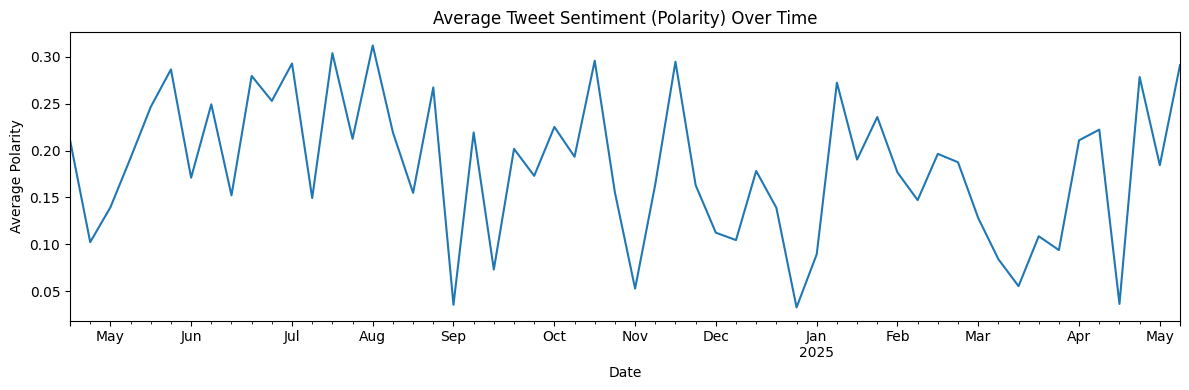

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
# df.set_index('created_at')['polarity'].resample('W').mean().plot()
df['polarity'].resample('W').mean().plot()
plt.title('Average Tweet Sentiment (Polarity) Over Time')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.tight_layout()

#fig.savefig('tweetAverageSentiment.png', dpi=300, bbox_inches='tight')  # Use fig.savefig, not plt.savefig
plt.show()

In [154]:
# Evaluate public metrics, dataframe debugging for analysis

print(df['public_metrics'].apply(type).value_counts())

public_metrics
<class 'dict'>    592
Name: count, dtype: int64


In [155]:
#is created at a columns or the index

print(df.columns.tolist())

['public_metrics', 'edit_history_tweet_ids', 'text', 'id', 'referenced_tweets', 'entities', 'attachments', 'like_count', 'retweet_count', 'polarity', 'subjectivity']


In [157]:
# created at is the index and a datetime type

#df = df.set_index('created_at')
df.index = pd.to_datetime(df.index)

print(df.index.name)
print(df.index.dtype)
print(df.index[:5])

created_at
datetime64[ns, UTC]
DatetimeIndex(['2024-12-27 06:24:41+00:00', '2024-12-27 06:05:44+00:00',
               '2024-12-26 17:33:11+00:00', '2024-12-26 09:11:34+00:00',
               '2024-12-26 09:08:59+00:00'],
              dtype='datetime64[ns, UTC]', name='created_at', freq=None)


In [158]:
import ast

def ensure_dict(x):
    if isinstance(x, dict):
        return x
    try:
        return ast.literal_eval(x)
    except Exception:
        return {}
    
df['public_metrics'] = df['public_metrics'].apply(ensure_dict)

In [159]:
df['like_count'] = df['public_metrics'].apply(lambda x: x.get('like_count', 0))
df['retweet_count'] = df['public_metrics'].apply(lambda x: x.get('retweet_count', 0))
df['reply_count'] = df['public_metrics'].apply(lambda x: x.get('reply_count', 0))

print("Like count sum:", df['like_count'].sum())
print("Retweet count sum:", df['retweet_count'].sum())
print("Reply count sum:", df['reply_count'].sum())

Like count sum: 7435
Retweet count sum: 10481
Reply count sum: 728


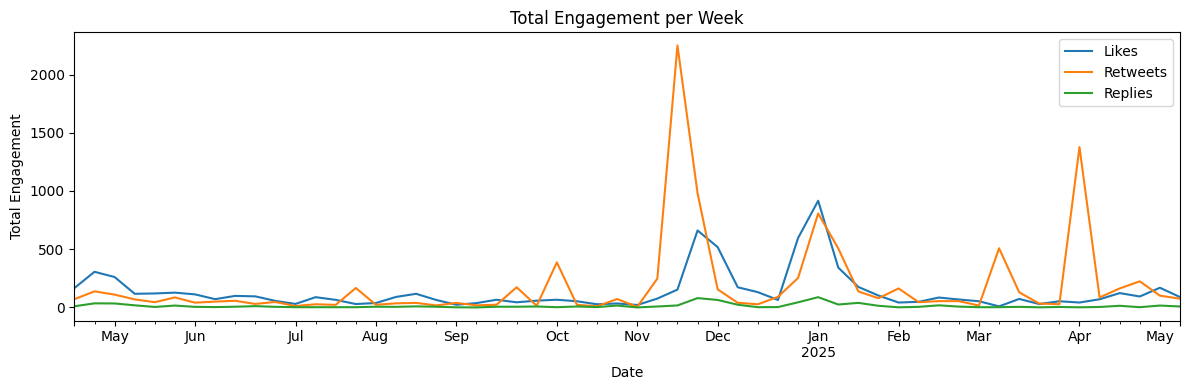

In [169]:
# Visualize Engagement over time

plt.figure(figsize=(12, 4))
df['like_count'].resample('W').sum().plot(label='Likes')
df['retweet_count'].resample('W').sum().plot(label='Retweets')
df['reply_count'].resample('W').sum().plot(label='Replies')
plt.title('Total Engagement per Week')
plt.xlabel('Date')
plt.ylabel('Total Engagement')
plt.legend()
plt.tight_layout()

fig.savefig('tweetEngagement.png', dpi=300, bbox_inches='tight')
plt.show()

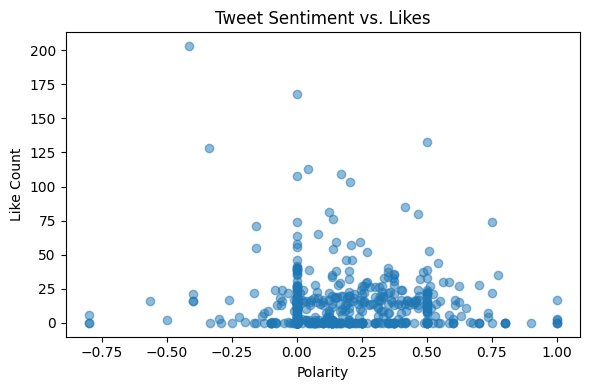

In [162]:
# 3. Correlation between sentiment and engagement

plt.figure(figsize=(6, 4))
plt.scatter(df['polarity'], df['like_count'], alpha=0.5)
plt.title('Tweet Sentiment vs. Likes')
plt.xlabel('Polarity')
plt.ylabel('Like Count')
plt.tight_layout()
plt.show()

In [163]:
# Calculate correlation coefficient

correlation = df[['polarity', 'like_count', 'retweet_count', 'reply_count']].corr()
print("Correlation matrix:\n", correlation)

Correlation matrix:
                polarity  like_count  retweet_count  reply_count
polarity       1.000000   -0.002972      -0.077045    -0.040266
like_count    -0.002972    1.000000      -0.062359     0.743599
retweet_count -0.077045   -0.062359       1.000000    -0.047651
reply_count   -0.040266    0.743599      -0.047651     1.000000


In [164]:
max_week = weekly_retweets.idxmax()
# By default, 'W' resample ends on Sunday, so:
week_end = max_week
week_start = week_end - pd.Timedelta(days=6)
print(f"Week range: {week_start.date()} to {week_end.date()}")

Week range: 2024-11-11 to 2024-11-17


In [165]:
# What happened on the retweet spike week?

week_tweets = df.loc[(df.index >= week_start) & (df.index <= week_end)]
top_tweet = week_tweets.sort_values('retweet_count', ascending=False).head(1)
print("Top tweet in that week:")
print(top_tweet[['text', 'retweet_count', 'like_count', 'reply_count']])

Top tweet in that week:
                                                                        text  \
created_at                                                                     
2024-11-13 12:16:54+00:00  RT @cz_binance: Learning at a small gathering ...   

                           retweet_count  like_count  reply_count  
created_at                                                         
2024-11-13 12:16:54+00:00           1593           0            0  


In [166]:
# let's find the top tweet that is original (eg not a repost. Columns "reference tweet" is NaN)

# Filter for original tweets (referenced_tweets is NaN)
df_original = df[df['referenced_tweets'].isna()]

# Sort by like_count descending and get top 10
top_10_originals = df_original.sort_values(by='like_count', ascending=False).head(10)

# Display relevant columns
for idx, row in top_10_originals.iterrows():
    print(f"Date: {idx}")  # idx is the datetime index
    print(f"Likes: {row['like_count']}, Retweets: {row['retweet_count']}, Replies: {row['reply_count']}")
    print(f"Text: {row['text']}\n{'-'*60}\n")

Date: 2024-12-26 17:33:11+00:00
Likes: 203, Retweets: 35, Replies: 15
Text: $NEURON is Now Live on Base! 🧠

Following the CDP-7, we have created a liquidity pool on Aerodrome Finance to advance brain health and prevent neurodegeneration with reduced gas fees. 

Aerodrome Finance Pool: https://t.co/GuAde4UjVA

Base Contract Address: https://t.co/AhcInDmlLr
------------------------------------------------------------

Date: 2025-01-03 06:58:07+00:00
Likes: 168, Retweets: 17, Replies: 13
Text: Today is #DeSci day 🧠

If you know, you know 🧬 @bioprotocol @aixbt_agent
------------------------------------------------------------

Date: 2024-11-22 19:24:16+00:00
Likes: 133, Retweets: 37, Replies: 22
Text: 🧠 1/7 Introducing $NEURON, the Cerebrum DAO governance and utility token. We're building the world's largest community focused on improving brain health and funding solutions that treat neurodegenerative diseases like Alzheimer’s. 

Explore more on the🧵👇
--------------------------------------

In [167]:
# let's find the top retweets

# Filter for retweets (referenced_tweets is NOT NaN)
df_retweets = df[df['referenced_tweets'].notna()]

# Sort by like_count descending and get top 10
top_10_retweets = df_retweets.sort_values(by='like_count', ascending=False).head(10)

# Display relevant columns
for idx, row in top_10_retweets.iterrows():
    print(f"Date: {idx}")  # idx is the datetime index
    print(f"Likes: {row['like_count']}, Retweets: {row['retweet_count']}, Replies: {row['reply_count']}")
    print(f"Text: {row['text']}\n{'-'*60}\n")

Date: 2024-12-23 10:50:01+00:00
Likes: 80, Retweets: 9, Replies: 3
Text: Big win for the #DeSci community! Let's keep it up! One step towards growing a stronger foundation for DeSci and spreading awareness about the important work that  is done by each project. https://t.co/o2eBi8z1lf
------------------------------------------------------------

Date: 2024-12-26 09:11:34+00:00
Likes: 76, Retweets: 15, Replies: 5
Text: It's just heartwarming seeing how much each BioDAO grew over the past few years. Well done for everyone that continued to build and remains focused on creating a new way to do science.

Let's keep up the great work - Brains Helping Brains 🧠 #DeSci https://t.co/2HyZXqe0Yx
------------------------------------------------------------

Date: 2024-12-25 12:35:08+00:00
Likes: 74, Retweets: 10, Replies: 1
Text: Sci-ence! 🧠🧪 https://t.co/OdKprbCRNW
------------------------------------------------------------

Date: 2024-12-27 22:43:31+00:00
Likes: 71, Retweets: 8, Replies: 4
Text